In [1]:
from sklearn.datasets import load_digits

data = load_digits()

print(data.keys())

dict_keys(['images', 'DESCR', 'target_names', 'target', 'data'])


In [2]:
# Target is the label and target_names are the classes
print(data["target_names"])
print(data["target"])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [3]:
import pandas as pd

# Create the featrue dataframe and label series
labels = pd.Series(data['target'])
data_df = pd.DataFrame(data['data'])
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


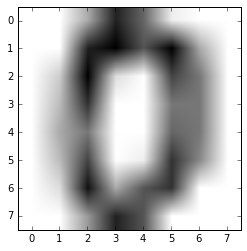

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Visualize the first data point

first_image = data_df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

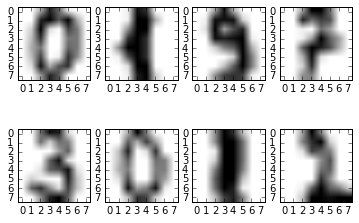

In [5]:
# Generate a scatter plot grid with 2 rows and 4 columns to visualize data
figure, axes = plt.subplots(2, 4)

axes[0, 0].imshow(data_df.iloc[0].values.reshape(8, 8), cmap = "gray_r")
axes[0, 1].imshow(data_df.iloc[99].values.reshape(8, 8), cmap = "gray_r")
axes[0, 2].imshow(data_df.iloc[199].values.reshape(8, 8), cmap = "gray_r")
axes[0, 3].imshow(data_df.iloc[299].values.reshape(8, 8), cmap = "gray_r")
axes[1, 0].imshow(data_df.iloc[999].values.reshape(8, 8), cmap = "gray_r")
axes[1, 1].imshow(data_df.iloc[1099].values.reshape(8, 8), cmap = "gray_r")
axes[1, 2].imshow(data_df.iloc[1199].values.reshape(8, 8), cmap = "gray_r")
axes[1, 3].imshow(data_df.iloc[1299].values.reshape(8, 8), cmap = "gray_r")

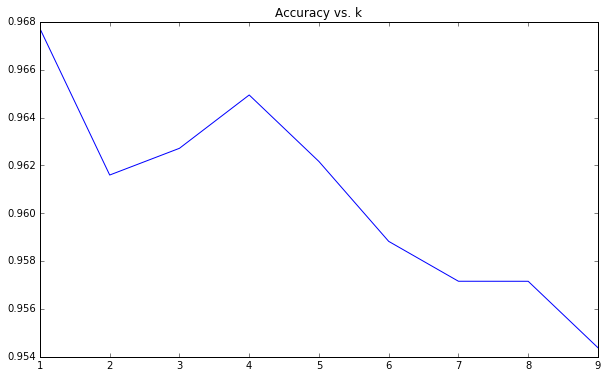

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Use the k-nearest neighbors algorithm
# Generate the fitted model
def train(k, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_features, train_labels)
    return knn

# Return the accuracy
def test(knn, test_features, test_labels):
    prediction = knn.predict(test_features)
    return accuracy_score(test_labels, prediction)

# Return the k-fold accuracies
def cross_validation(k):
    accuracies = []
    kfold = KFold(n_splits = 4, random_state = 1)
    for train_index, test_index in kfold.split(data_df):
        train_features = data_df.loc[train_index]
        test_features = data_df.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        knn = train(k, train_features, train_labels)
        accuracy = test(knn, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

# Visualize the results
k_list = list(range(1, 10))
overall_accuracies = []

for k in k_list:
    overall_accuracies.append(np.mean(cross_validation(k)))
    
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs. k")
plt.plot(k_list, overall_accuracies)
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



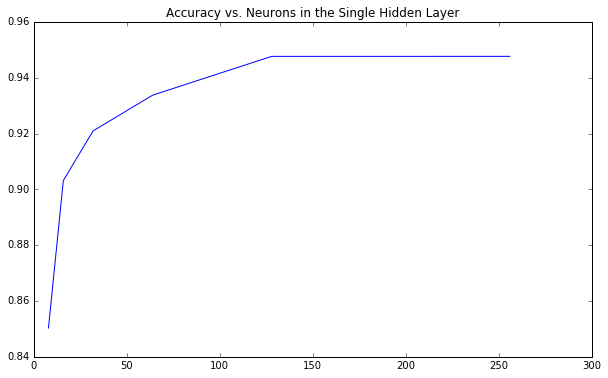

In [10]:
# Use the neural network algorithm
from sklearn.neural_network import MLPClassifier

def train_mlp(n, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = n, max_iter = 200)
    mlp.fit(train_features, train_labels)
    return mlp

# Return the accuracy
def test_mlp(mlp, test_features, test_labels):
    prediction = mlp.predict(test_features)
    return accuracy_score(test_labels, prediction)

# Return the k-fold accuracies
def cross_validation_mlp(n):
    accuracies = []
    kfold = KFold(n_splits = 4, random_state = 1)
    for train_index, test_index in kfold.split(data_df):
        train_features = data_df.loc[train_index]
        test_features = data_df.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        mlp = train_mlp(n, train_features, train_labels)
        accuracy = test_mlp(mlp, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

# Visualize the results
n_list = [(8,), (16,), (32,), (64,), (128,), (256,)]
overall_accuracies_mlp = []

for n in n_list:
    overall_accuracies_mlp.append(np.mean(cross_validation_mlp(n)))
    
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs. Neurons in the Single Hidden Layer")
plt.plot([n[0] for n in n_list], overall_accuracies_mlp)
plt.show()

Increasing the number of neurons used in the single hidden layer improves the accuracy to approximately 94%, which is lower than the accuracy of 96% of the k-nearest neighbors algorithm.

In [12]:
# Check the performance of two hidden layers
accuracy_2_hl = cross_validation_mlp((64, 64))

In [15]:
print(np.mean(accuracy_2_hl))

0.93822568671121


Using two hidden layers does not improve the accuracy much, especially compared to the single hidden layer using 64 neurons.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



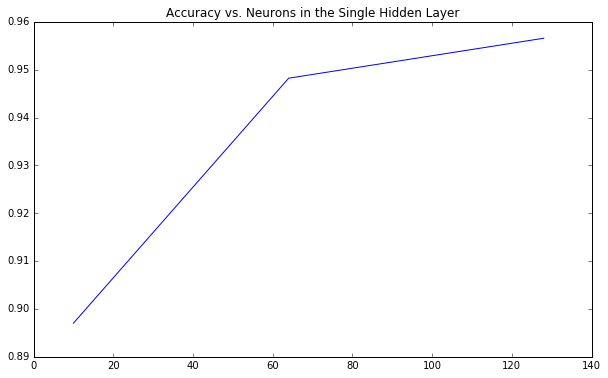

In [16]:
n_3_list = [(10, 10, 10), (64, 64, 64), (128, 128, 128)]

def cross_validation_mlp_2(n):
    accuracies = []
    kfold = KFold(n_splits = 6, random_state = 1)
    for train_index, test_index in kfold.split(data_df):
        train_features = data_df.loc[train_index]
        test_features = data_df.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        mlp = train_mlp(n, train_features, train_labels)
        accuracy = test_mlp(mlp, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

# Visualize the results
overall_accuracies_mlp_3 = []

for n in n_3_list:
    overall_accuracies_mlp_3.append(np.mean(cross_validation_mlp_2(n)))
    
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs. Neurons in the Single Hidden Layer")
plt.plot([n[0] for n in n_3_list], overall_accuracies_mlp_3)
plt.show()

Using three hidden layers further improves the accuracy to close to 96% with 128 neurons in each hidden layer.